<a href="https://colab.research.google.com/github/elliothebert/quantitative-analysis/blob/main/CNN_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [2]:
def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels


training_images, training_labels = get_data('/content/drive/MyDrive/sign_mnist_train/sign_mnist_train.csv')
testing_images, testing_labels = get_data('/content/drive/MyDrive/sign_mnist_test/sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=10,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


857/857 [==============================] - 57s 65ms/step - loss: 2.7869 - accuracy: 0.1590 - val_loss: 2.1229 - val_accuracy: 0.2903
Epoch 2/10
857/857 [==============================] - 54s 63ms/step - loss: 1.9934 - accuracy: 0.3650 - val_loss: 1.3240 - val_accuracy: 0.5279
Epoch 3/10
857/857 [==============================] - 55s 64ms/step - loss: 1.6507 - accuracy: 0.4732 - val_loss: 1.1184 - val_accuracy: 0.6182
Epoch 4/10
857/857 [==============================] - 53s 62ms/step - loss: 1.4246 - accuracy: 0.5387 - val_loss: 1.0342 - val_accuracy: 0.6355
Epoch 5/10
857/857 [==============================] - 53s 62ms/step - loss: 1.2695 - accuracy: 0.5880 - val_loss: 0.7564 - val_accuracy: 0.7465
Epoch 6/10
857/857 [==============================] - 59s 69ms/step - loss: 1.1397 - accuracy: 0.6243 - val_loss: 0.8168 - val_accuracy: 0.7132
Epoch 7/10
857/857 [==============================] - 53s 62ms/step - loss: 1.0710 - accuracy: 0.6430 - val_loss: 0.6052 - val_accuracy: 0.8023
Epo

[374.4366760253906, 0.5037646293640137]

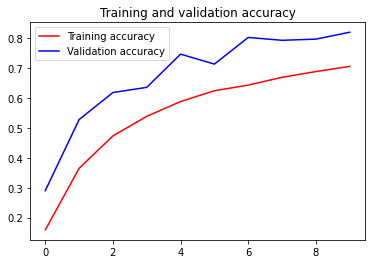

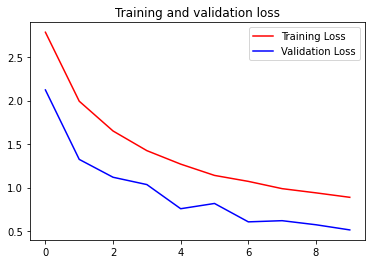

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()